In [13]:
bids_folder = '/data/ds-tmsrisk/'
import os.path as op
import arviz as az

from tms_risk.cogmodels.fit_model import build_model, get_data
import pymc as pm
from tqdm.notebook import tqdm

In [14]:
dfs = []
models = []
idatas = []

model_labels  = ['flexible2_null', 'flexible2', 'flexible2a', 'flexible2b', '11a', '11b', '11c', '11_null']

for model_label in tqdm(model_labels):
    dfs.append(get_data(model_label=model_label))

    model = build_model(model_label, dfs[-1])
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf')).sel(draw=slice(None, None, 2))
    model.build_estimation_model()
    with model.estimation_model:
        pm.compute_log_likelihood(idata)

    models.append(build_model(model_label, dfs[-1]))
    idatas.append(idata)

  0%|          | 0/8 [00:00<?, ?it/s]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [15]:
model_mapping = {
    'flexible2': 'Flexible PMC model (TMS affects both perception and working memory)',
    'flexible2a':'Flexible PMC model (TMS affects working memory only)',
    'flexible2b':'Flexible PMC model (TMS affects perception only)',
    '11a':'Weber PMC model (TMS affects memory only)',
    '11b':'Weber PMC model (TMS affects perception only)',
    '11c':'Weber PMC model (TMS affects both perception and memory)',
    '11_null':'Weber PMC null model',
    'flexible2_null':'Flexible PMC null model'}

In [16]:
models = {}
for model_label, idata in zip(model_labels, idatas):
    models[model_mapping[model_label]] = idata

In [17]:
comparison = az.compare(models)

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/envs/

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

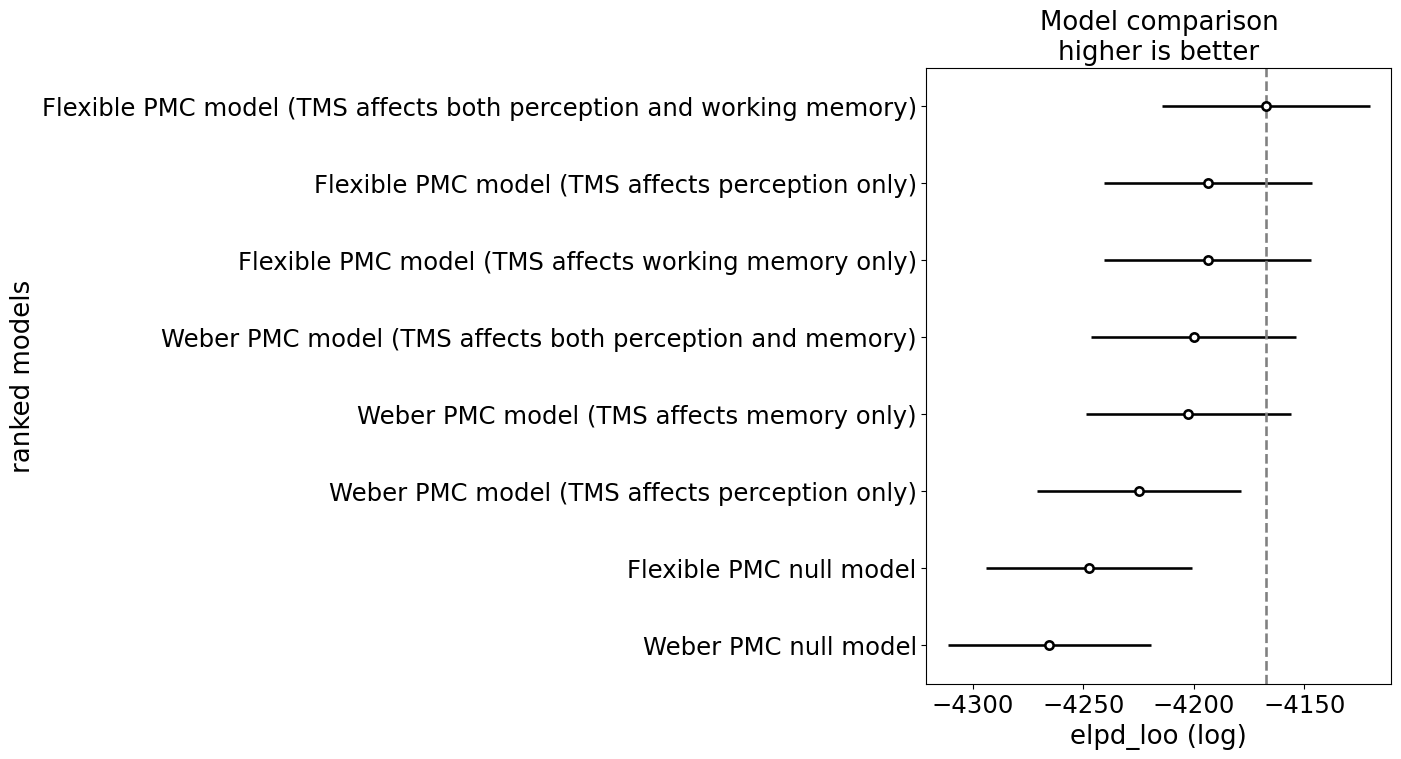

In [20]:
az.plot_compare(comparison)

In [25]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Flexible PMC model (TMS affects both perception and working memory),0,-4167.403109,300.276302,0.000000,6.530114e-01,47.195646,0.000000,True,log
Flexible PMC model (TMS affects perception only),1,-4193.552254,264.658422,26.149145,2.635297e-11,47.184221,7.590263,True,log
Flexible PMC model (TMS affects working memory only),2,-4193.700108,252.633797,26.296998,4.411400e-11,46.891626,8.120456,True,log
Weber PMC model (TMS affects both perception and memory),3,-4200.126385,154.570346,32.723276,3.469886e-01,46.404855,14.995798,True,log
Weber PMC model (TMS affects memory only),4,-4202.542658,170.282993,35.139549,3.819189e-11,46.391949,14.521885,True,log
Weber PMC model (TMS affects perception only),5,-4225.000993,160.167968,57.597884,3.306726e-11,46.213241,15.127265,False,log
Flexible PMC null model,6,-4247.600742,190.013254,80.197633,1.469200e-11,46.600853,12.539190,True,log
Weber PMC null model,7,-4265.504462,127.198526,98.101353,0.000000e+00,46.007999,16.245848,False,log


In [24]:
import ace_tools as tools
tools.display_dataframe_to_user("Model Comparison Table", comparison)

ModuleNotFoundError: No module named 'ace_tools'